In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Importing and getting a glance at the data we're working with
df = pd.read_csv('/kaggle/input/top-10000-spotify-songs-1960-now/top_10000_1960-now.csv')
df.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


In [2]:
# Selecting the relevant columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Track URI             9999 non-null   object 
 1   Track Name            9998 non-null   object 
 2   Artist URI(s)         9997 non-null   object 
 3   Artist Name(s)        9998 non-null   object 
 4   Album URI             9997 non-null   object 
 5   Album Name            9998 non-null   object 
 6   Album Artist URI(s)   9997 non-null   object 
 7   Album Artist Name(s)  9997 non-null   object 
 8   Album Release Date    9997 non-null   object 
 9   Album Image URL       9995 non-null   object 
 10  Disc Number           9999 non-null   int64  
 11  Track Number          9999 non-null   int64  
 12  Track Duration (ms)   9999 non-null   int64  
 13  Track Preview URL     7102 non-null   object 
 14  Explicit              9999 non-null   bool   
 15  Popularity           

In [3]:
# We're selecting columns that describe the song and artist's genres, release date, as well as metrics such as 'Acousticness', 'Liveness', and others. Our goal is to explore whether any of these factors are relevant to a song's popularity.
df = df[['Track Name','Artist Name(s)','Album Name','Album Release Date','Track Number','Track Duration (ms)','Explicit','Popularity','Artist Genres','Danceability','Energy','Key','Loudness','Mode','Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo','Time Signature','Label']]
df.head()

,Track Name,Artist Name(s),Album Name,Album Release Date,Track Number,Track Duration (ms),Explicit,Popularity,Artist Genres,Danceability,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label
0,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,1992-08-03,3,216270,False,0,"acid house,ambient house,big beat,hip house",0.617,...,-12.305,1.0,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,Jams Communications
1,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,2009-10-23,3,237120,False,64,"dance pop,miami hip hop,pop",0.825,...,-5.995,1.0,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,Mr.305/Polo Grounds Music/J Records
2,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),1999-01-12,6,312533,False,56,"dance pop,pop",0.677,...,-5.171,1.0,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,Jive
3,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",2014-10-20,11,233400,False,42,"album rock,art rock,british invasion,classic r...",0.683,...,-8.920,1.0,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,Sanctuary Records
4,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,1969-12-05,9,448720,False,0,"album rock,british invasion,classic rock,rock",0.319,...,-9.611,1.0,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,Universal Music Group


In [4]:
# Converting 'Album Release Date' to date format, errors will be coerced as it will not influence or analysis
df['Album Release Date'] = pd.to_datetime(df['Album Release Date'],format='mixed',errors='coerce')
df['Album Release Date'].info()
df.shape[0]

<class 'pandas.core.series.Series'>
RangeIndex: 9999 entries, 0 to 9998
Series name: Album Release Date
Non-Null Count  Dtype         
--------------  -----         
9996 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


9999

In [5]:
# Checking nulls
df.isna().sum()

Track Name               1
Artist Name(s)           1
Album Name               1
Album Release Date       3
Track Number             0
Track Duration (ms)      0
Explicit                 0
Popularity               0
Artist Genres          550
Danceability             2
Energy                   2
Key                      2
Loudness                 2
Mode                     2
Speechiness              2
Acousticness             2
Instrumentalness         2
Liveness                 2
Valence                  2
Tempo                    2
Time Signature           2
Label                    6
dtype: int64

In [6]:
# Seeing the relevance of the nulls
df_null = df[df.isnull().any(axis=1)]
df_null

,Track Name,Artist Name(s),Album Name,Album Release Date,Track Number,Track Duration (ms),Explicit,Popularity,Artist Genres,Danceability,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label
17,Baby Sittin' Boogie - Radio Version,Buzz Clifford,Rock & Roll 50s & 60s Mix,2016-10-01,24,122958,False,6,NaN,0.483,...,-9.883,1.0,0.1450,0.80500,0.000000,0.1610,0.878,140.110,4.0,Rock Miramike
41,Shoop Shoop Diddy Wop Cumma Cumma Wang Dang,Monte Video,Monte Video,1983-12-01,1,159184,False,28,NaN,0.706,...,-10.526,1.0,0.4110,0.22600,0.000000,0.0496,0.972,181.337,4.0,WM New Zealand
62,One In A Million,"Jordie Ireland, Ava Hayz",One In A Million,2018-05-04,1,178424,False,27,NaN,0.748,...,-5.772,1.0,0.0907,0.32700,0.000014,0.0960,0.334,104.175,4.0,Universal Music Australia Pty. Ltd.
83,Dream Girl,David Jones,David Jones,1965-01-01,8,136293,False,7,NaN,0.617,...,-9.223,1.0,0.0512,0.49400,0.000000,0.2930,0.949,128.363,4.0,Rhino
93,Forever Young,Youth Group,Casino Twilight Dogs,2007-01-30,8,239120,False,54,NaN,0.379,...,-6.863,1.0,0.0307,0.01670,0.000679,0.0915,0.301,115.272,4.0,Anti/Epitaph
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9891,Pornstar,Amy Meredith,Restless,2010-07-02,2,196413,False,0,NaN,0.456,...,-3.692,1.0,0.1500,0.00499,0.000000,0.3670,0.515,148.061,4.0,Sony Music Entertainment
9933,Rock and Roll (Part 1),Gary Glitter,The Ultimate Gary Glitter,2011-11-13,1,184840,False,40,NaN,0.694,...,-11.491,1.0,0.0727,0.04020,0.017600,0.5290,0.380,129.813,4.0,Snapper Music
9954,Bloke,Chris Franklin,You Wouldn't Want Me Any Other Way,2020-04-17,2,257693,True,37,NaN,0.715,...,-13.115,1.0,0.0338,0.03220,0.000000,0.0651,0.543,97.999,4.0,A-List Entertainment
9988,Bridge of Light,The Future Hit Makers,The Greatest Tribute to Pink,2011-12-01,1,243696,False,11,NaN,0.551,...,-8.587,1.0,0.0310,0.28800,0.000000,0.1050,0.162,143.669,4.0,Big Eye Music


In [7]:
# Dropping nulls
df.dropna(inplace=True)
df.isna().sum()

Track Name             0
Artist Name(s)         0
Album Name             0
Album Release Date     0
Track Number           0
Track Duration (ms)    0
Explicit               0
Popularity             0
Artist Genres          0
Danceability           0
Energy                 0
Key                    0
Loudness               0
Mode                   0
Speechiness            0
Acousticness           0
Instrumentalness       0
Liveness               0
Valence                0
Tempo                  0
Time Signature         0
Label                  0
dtype: int64

In [8]:
# Removing duplicates and creating a decade column
df.drop_duplicates(keep='first', inplace=True)
df.shape[0]

9398

In [9]:
# Creating a decade column for summaring the period and context of song period
df['Year'] = df['Album Release Date'].dt.year
df['Decade'] = (df['Year'] // 10) * 10
df['Decade'] = df['Decade'].astype('int64')
df.head()

,Track Name,Artist Name(s),Album Name,Album Release Date,Track Number,Track Duration (ms),Explicit,Popularity,Artist Genres,Danceability,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label,Year,Decade
0,Justified & Ancient - Stand by the Jams,The KLF,Songs Collection,1992-08-03,3,216270,False,0,"acid house,ambient house,big beat,hip house",0.617,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,Jams Communications,1992,1990
1,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,2009-10-23,3,237120,False,64,"dance pop,miami hip hop,pop",0.825,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,Mr.305/Polo Grounds Music/J Records,2009,2000
2,From the Bottom of My Broken Heart,Britney Spears,...Baby One More Time (Digital Deluxe Version),1999-01-12,6,312533,False,56,"dance pop,pop",0.677,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,Jive,1999,1990
3,Apeman - 2014 Remastered Version,The Kinks,"Lola vs. Powerman and the Moneygoround, Pt. On...",2014-10-20,11,233400,False,42,"album rock,art rock,british invasion,classic r...",0.683,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,Sanctuary Records,2014,2010
4,You Can't Always Get What You Want,The Rolling Stones,Let It Bleed,1969-12-05,9,448720,False,0,"album rock,british invasion,classic rock,rock",0.319,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,Universal Music Group,1969,1960


In [10]:
df.columns

Index(['Track Name', 'Artist Name(s)', 'Album Name', 'Album Release Date',
       'Track Number', 'Track Duration (ms)', 'Explicit', 'Popularity',
       'Artist Genres', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Time Signature', 'Label', 'Year', 'Decade'],
      dtype='object')

In [11]:
# Preprocessing
df['combined_features'] = df['Track Name'] + ' ' + df['Artist Name(s)'] + ' ' + df['Album Name'] + ' ' + df['Artist Genres'] + ' ' + df['Year'].astype(str) + ' ' + df['Decade'].astype(str)

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

In [12]:
# Calculating similarities between songs
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [13]:
# Building a recommendation song system
def get_recommendations(track_name, artist_name, cosine_sim=cosine_sim):
    # Step 1: Find the index of the given track
    idx = df[df['Track Name'] == track_name].index[0]  
    
    # Step 2: Calculate similarity scores for the track
    sim_scores = list(enumerate(cosine_sim[idx]))  
    
    # Step 3: Sort the similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  
    
    # Step 4: Exclude the original track from recommendations
    sim_scores = sim_scores[1:]  
    
    # Step 5: Initialize a list for recommended tracks
    recommended_tracks = []  
    
    # Step 6: Loop through similar track indices to find tracks
    for i in sim_scores:
        current_track_index = i[0]  
        current_artist = df['Artist Name(s)'].iloc[current_track_index]  
        
        # Step 7: Check if the artist is not the original
        if current_artist != artist_name:  
            # Add track details to the recommended list
            recommended_tracks.append(df[['Track Name', 'Artist Name(s)', 'Album Name', 'Year']].iloc[current_track_index])  
        
        # Step 8: Limit recommendations to 5 tracks
        if len(recommended_tracks) >= 5:  
            break
            
    # Step 9: Return an empty DataFrame if no recommendations found
    if len(recommended_tracks) == 0:
        return pd.DataFrame(columns=['Track Name', 'Artist Name(s)', 'Album Name', 'Year'])  
    
    # Step 10: Return a DataFrame of the recommended tracks
    return pd.DataFrame(recommended_tracks)  

In [14]:
# Testing system
recommendations = get_recommendations('Apeman - 2014 Remastered Version','The Kinks')
recommendations

,Track Name,Artist Name(s),Album Name,Year
8339,Who Are You,The Who,Who Are You (Remastered),1978
7749,Who Are You,The Who,Who Are You,1978
1220,Nights In White Satin - Single Version / Mono,The Moody Blues,Days Of Future Passed (Deluxe Version),1967
9484,It's My Life,The Animals,The Singles Plus,1987
9620,Homburg - Single Version - 2009 Remaster - Mono,Procol Harum,Hits'n'Flips,2019


In [15]:
# Building the same system but for discovering new artists
def get_artist_recommendations(track_name, artist_name, cosine_sim=cosine_sim):
    # Step 1: Find the index of the given track
    idx = df[df['Track Name'] == track_name].index[0]  
    
    # Step 2: Calculate similarity scores for the track
    sim_scores = list(enumerate(cosine_sim[idx]))  
    
    # Step 3: Sort the similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  
    
    # Step 4: Exclude the original track from recommendations
    sim_scores = sim_scores[1:]  
    
    # Step 5: Extract indices of similar tracks
    artist_indices = [i[0] for i in sim_scores]  
    
    # Step 6: Initialize a list for recommended artists
    recommended_artists = []  
    
    # Step 7: Loop through similar track indices to find artists
    for i in artist_indices:  
        current_artist = df['Artist Name(s)'].iloc[i]  
        
        # Step 8: Check if the artist is not the original and not already recommended
        if current_artist not in recommended_artists and current_artist != artist_name:  
            recommended_artists.append(current_artist)  
        
        # Step 9: Limit recommendations to 5 artists
        if len(recommended_artists) >= 5:  
            break
            
    # Step 10: Return the list of recommended artists
    return recommended_artists  

In [16]:
# Testing artists recommendations systems:
artist_recommendations = get_artist_recommendations('Apeman - 2014 Remastered Version','The Kinks')
print(artist_recommendations)

['The Who', 'The Moody Blues', 'The Animals', 'Procol Harum', 'The Yardbirds']


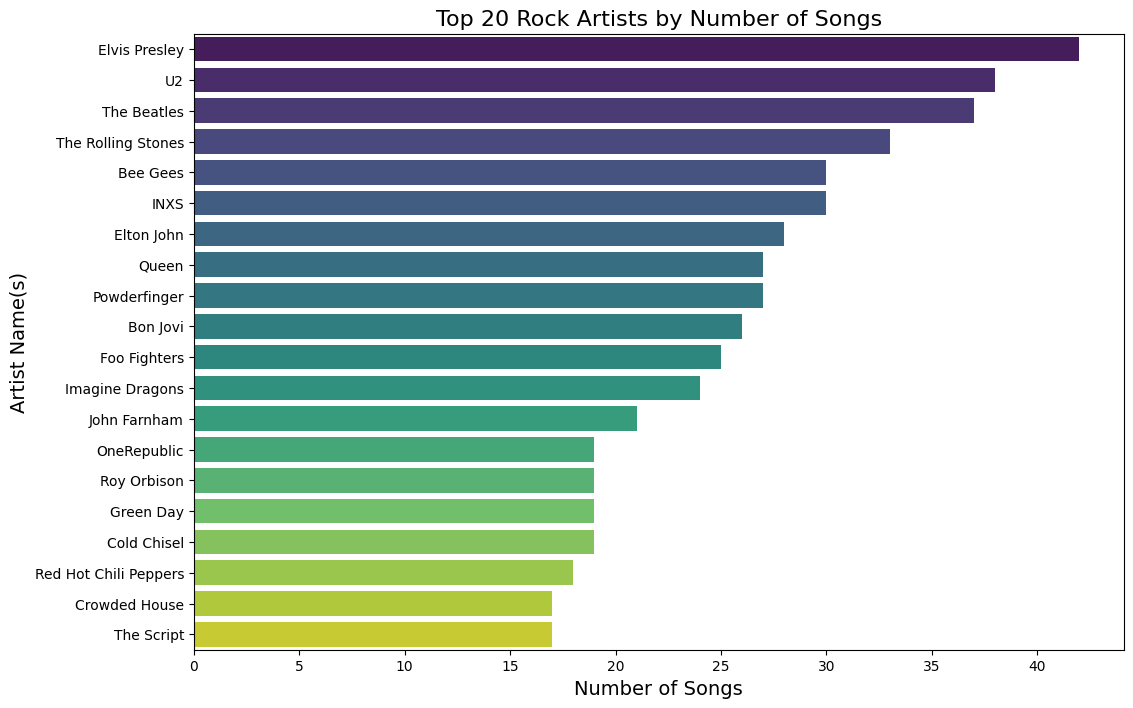

In [17]:
# Top 20 Rock Artists
# Filter the DataFrame for artists with 'rock' in their genres
rock_artists_df = df[df['Artist Genres'].str.contains('rock', case=False, na=False)]

# Count the number of songs for each artist
artist_counts = rock_artists_df['Artist Name(s)'].value_counts()

# Get the top 20 artists with the most songs
top_20_rock_artists = artist_counts.head(20)

# Convert the result to a DataFrame for better readability (optional)
top_20_rock_artists_df = top_20_rock_artists.reset_index()
top_20_rock_artists_df.columns = ['Artist Name(s)', 'Number of Songs']

# Set up the plot
plt.figure(figsize=(12, 8))  # Set the size of the plot
sns.barplot(data=top_20_rock_artists_df, x='Number of Songs', y='Artist Name(s)', palette='viridis')

# Add titles and labels
plt.title('Top 20 Rock Artists by Number of Songs', fontsize=16)
plt.xlabel('Number of Songs', fontsize=14)
plt.ylabel('Artist Name(s)', fontsize=14)

# Show the plot
plt.show()

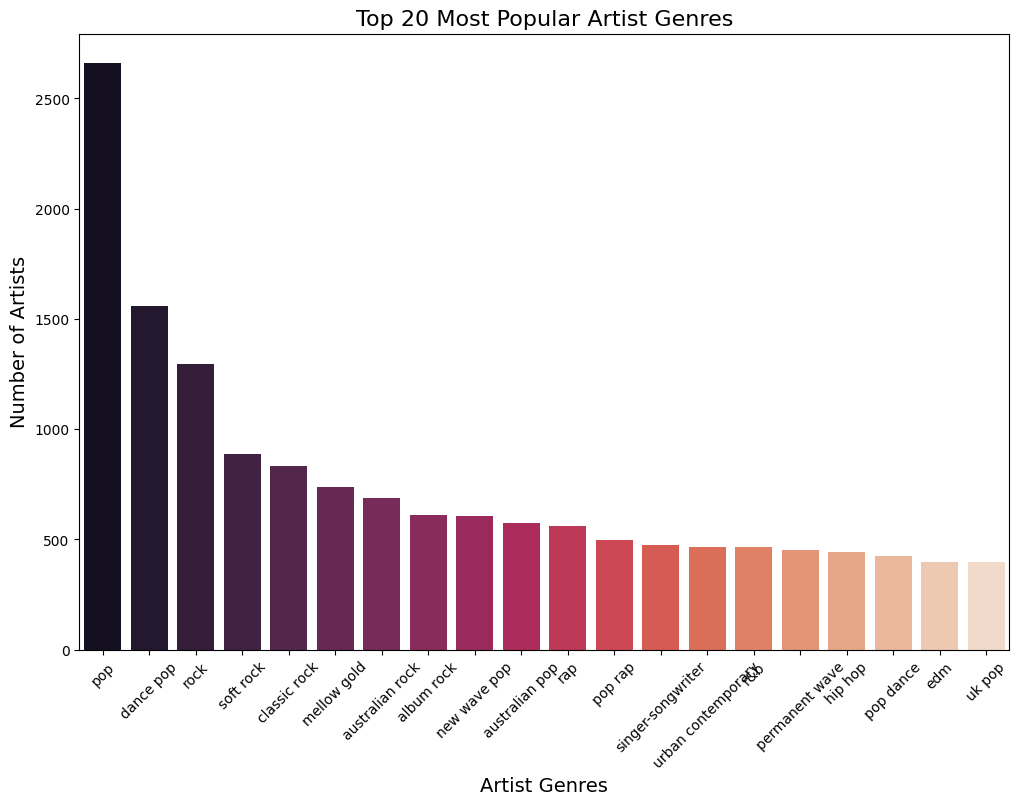

In [18]:
# Finding the top 20 most popular musical genres
# Split the 'Artist Genres' column into separate genres
all_genres = df['Artist Genres'].str.split(',').explode().str.strip()  # Split and flatten the genres
all_genres_counts = all_genres.value_counts()  # Count occurrences of each genre

# Get the top 20 most popular genres
top_20_genres = all_genres_counts.head(20)

# Create a DataFrame for visualization
top_20_genres_df = top_20_genres.reset_index()
top_20_genres_df.columns = ['Artist Genre', 'Number of Artists']  # Rename columns for clarity

# Set up the plot
plt.figure(figsize=(12, 8))  # Set the size of the plot
sns.barplot(data=top_20_genres_df, x='Artist Genre', y='Number of Artists', palette='rocket')

# Add titles and labels
plt.title('Top 20 Most Popular Artist Genres', fontsize=16)
plt.xlabel('Artist Genres', fontsize=14)
plt.ylabel('Number of Artists', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

Danceability        0.052485
Energy              0.003514
Key                 0.011608
Loudness            0.026238
Mode               -0.015444
Speechiness         0.016729
Acousticness       -0.017300
Instrumentalness   -0.029694
Liveness           -0.028903
Valence            -0.002197
Tempo              -0.009382
Time Signature      0.036194
Name: Popularity, dtype: float64


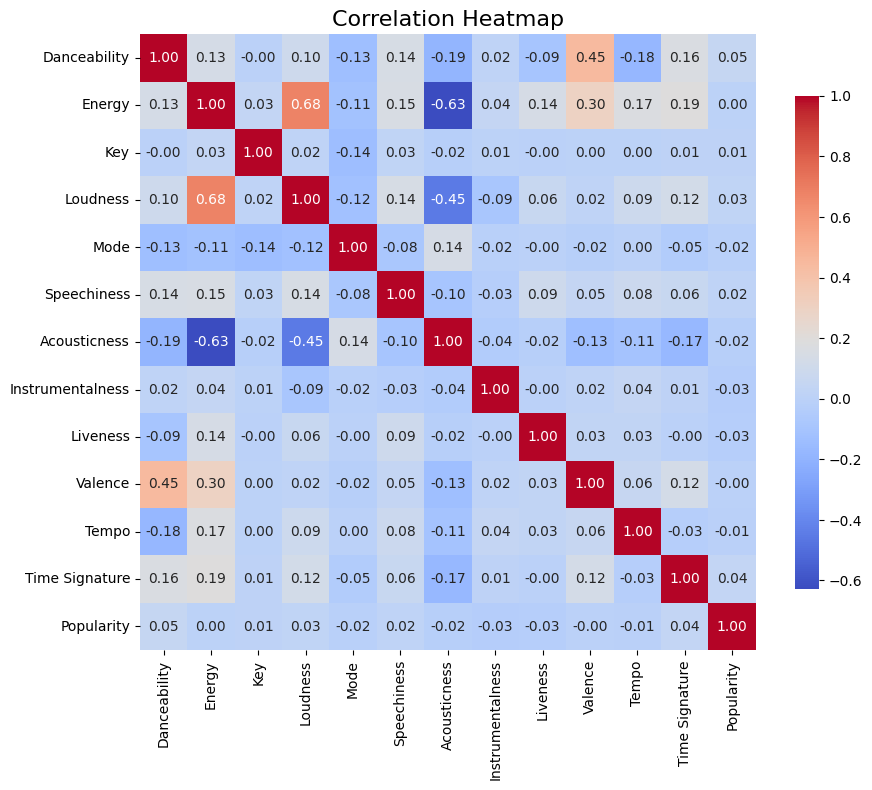

In [19]:
# Seeing the correlation between features
# Select the columns we’re interested in
features = ['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 
            'Speechiness', 'Acousticness', 'Instrumentalness', 
            'Liveness', 'Valence', 'Tempo', 'Time Signature']

# Calculate the correlation matrix, including the popularity of each song
correlation_matrix = df[features + ['Popularity']].corr()

# Extract only the correlations of each feature with Popularity, ignoring Popularity’s self-correlation
popularity_correlation = correlation_matrix['Popularity'].drop('Popularity')

# Display how each feature correlates with Popularity
print(popularity_correlation)

# Set up a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [20]:
# Finding the top 3 most popular artists of each decade
# First, we group the data by decade and artist, adding up the popularity scores within each group
top_artists_per_decade = df.groupby(['Decade', 'Artist Name(s)'])['Popularity'].sum().reset_index()

# Then, for each decade, we find the top 3 artists with the highest popularity scores
top_3_artists = top_artists_per_decade.groupby('Decade').apply(lambda x: x.nlargest(3, 'Popularity')).reset_index(drop=True)

# Display the table with the top 3 artists per decade
print(top_3_artists)

    Decade             Artist Name(s)  Popularity
0     1950              Elvis Presley         326
1     1950  Buddy Holly, The Crickets         188
2     1950                Bobby Darin         135
3     1960                The Beatles        1479
4     1960              Elvis Presley         828
5     1960         The Rolling Stones         798
6     1970                       ABBA         851
7     1970                      Queen         827
8     1970                   Bee Gees         674
9     1980                    Madonna         585
10    1980               Phil Collins         574
11    1980                      AC/DC         511
12    1990      Red Hot Chili Peppers         632
13    1990            Backstreet Boys         610
14    1990               Mariah Carey         588
15    2000                    Madonna        1186
16    2000             Britney Spears        1122
17    2000                 Nickelback         975
18    2010                 Ed Sheeran        2227


/tmp/ipykernel_17/3997798471.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_artists = top_artists_per_decade.groupby('Decade').apply(lambda x: x.nlargest(3, 'Popularity')).reset_index(drop=True)
